# Preamble

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D

import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2classes.csv to 2classes.csv
Saving 3classes.csv to 3classes.csv


# Instructions

In [ ]:
input_df2=pd.read_csv("2classes.csv", index_col=0)
input_df3=pd.read_csv("3classes.csv", index_col=0)

## 1. Implementation of LDA and QDA

### 2classes

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(input_df2.iloc[:,:-1], input_df2.iloc[:,-1], test_size = 0.3)

In [ ]:
# LDA model
lda_model2 = LinearDiscriminantAnalysis()
lda_model2.fit(X_train2, y_train2)
y_pred_lda = lda_model2.predict(X_test2)

# QDA model
qda_model2 = QuadraticDiscriminantAnalysis()
qda_model2.fit(X_train2, y_train2)
y_pred_qda = qda_model2.predict(X_test2)

### 3classes

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(input_df3.iloc[:,:-1], input_df3.iloc[:,-1], test_size = 0.3)

In [ ]:
# LDA model
lda_model3 = LinearDiscriminantAnalysis()
lda_model3.fit(X_train3, y_train3)
y_pred_lda = lda_model3.predict(X_test3)

# QDA model
qda_model3 = QuadraticDiscriminantAnalysis()
qda_model3.fit(X_train3, y_train3)
y_pred_qda = qda_model3.predict(X_test3)

## 2. Creating the Python function for the decision boundary visualization

In [ ]:
def visualize_decision_boundary(X, y, model_name, model, labels, boundary_colors, data_colors):

  x_min, x_max = X.iloc[:, 0].min() - 5, X.iloc[:, 0].max() + 5
  y_min, y_max = X.iloc[:, 1].min() - 50, X.iloc[:, 1].max() + 50

  xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = np.vectorize(labels.index)(Z)
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha=0.3, cmap = ListedColormap(boundary_colors))

  colors_list = [data_colors[pred] for pred in y]

  plt.scatter(X.INCOME, X.CREDIT_SCORE, c = colors_list, marker='o', edgecolors='k')

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  plt.title(f'{model_name}')
  plt.xlabel('Income')
  plt.ylabel('Credit Score')

  legend_handles = [
    Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10, markeredgecolor='k')
    for label, color in data_colors.items()]

  plt.legend(handles=legend_handles, title="Classes", loc='upper right')

  plt.savefig(f"{model_name}.png")

  return plt.show()


# Outputs

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


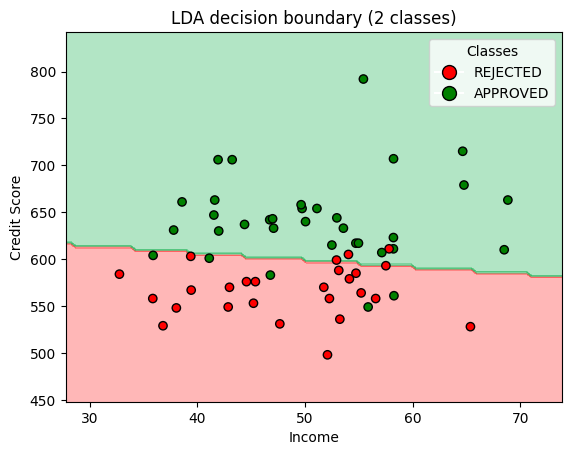

In [ ]:
# 2 classes, LDA
X = X_test2
y = y_test2
model_name = "LDA decision boundary (2 classes)"
model = lda_model2
labels = ['REJECTED', 'APPROVED']
boundary_colors = ['#FF1111', '#00ab41']
data_colors = {'REJECTED': 'red',
             'APPROVED': 'green'}

visualize_decision_boundary(X, y, model_name, model, labels, boundary_colors, data_colors)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


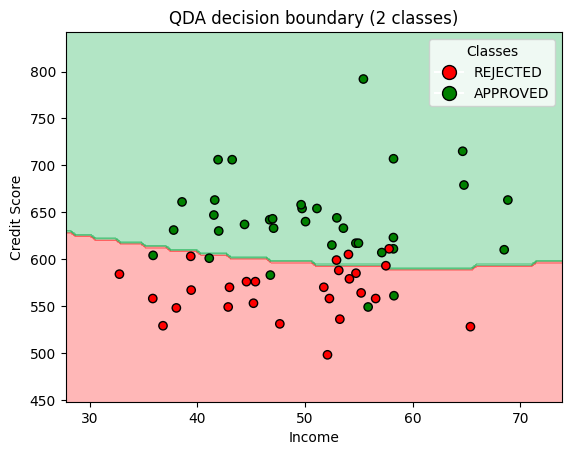

In [ ]:
# 2 classes, QDA
X = X_test2
y = y_test2
model_name = "QDA decision boundary (2 classes)"
model = qda_model2
labels = ['REJECTED', 'APPROVED']
boundary_colors = ['#FF1111', '#00ab41']
data_colors = {'REJECTED': 'red',
             'APPROVED': 'green'}

visualize_decision_boundary(X, y, model_name, model, labels, boundary_colors, data_colors)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


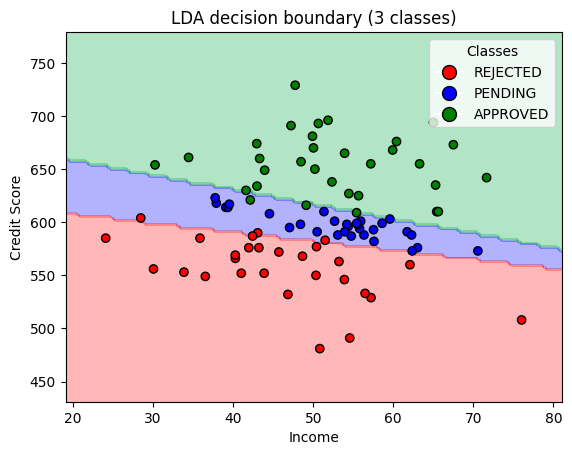

In [ ]:
# 3 classes, LDA
X = X_test3
y = y_test3
model_name = "LDA decision boundary (3 classes)"
model = lda_model3
labels = ['REJECTED', 'PENDING', 'APPROVED']
boundary_colors = ['#FF1111', '#0000FF', '#00ab41']
data_colors = {'REJECTED': 'red',
               'PENDING': 'blue',
             'APPROVED': 'green'}

visualize_decision_boundary(X, y, model_name, model, labels, boundary_colors, data_colors)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


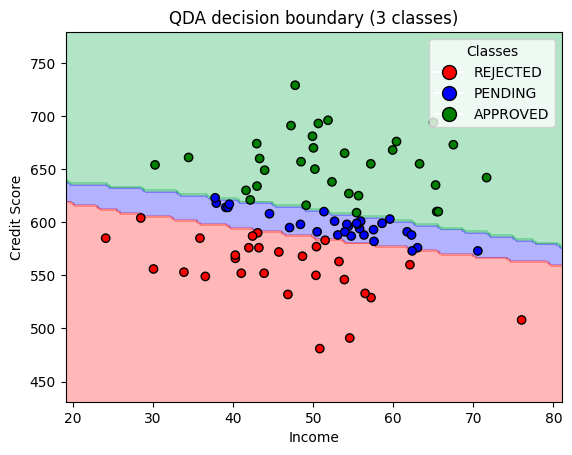

In [ ]:
# 3 classes, QDA
X = X_test3
y = y_test3
model_name = "QDA decision boundary (3 classes)"
model = qda_model3
labels = ['REJECTED', 'PENDING', 'APPROVED']
boundary_colors = ['#FF1111', '#0000FF', '#00ab41']
data_colors = {'REJECTED': 'red',
               'PENDING': 'blue',
             'APPROVED': 'green'}

visualize_decision_boundary(X, y, model_name, model, labels, boundary_colors, data_colors)

*In this description, we say "transition" to refer to the regions in the feature space (i.e., the Income-Credit Score plane in our visualizations) where the classification shifts from one class to another. These are the boundaries of change between classes.

LDA, 2-Classes

General trends are captured but the model struggles with points that overlap near the boundary. This may be a limitation in modeling complex relationships.

QDA, 2-Classes

Since the decision boundary is non-linear, it curves better to follow the class distributions since the separation is more flexible especially in areas with overlapping classes. This offers improved classification compared to LDA.

LDA, 3-Classes

The linear boundaries now divide the feature space into three distinct regions for "REJECTED," "PENDING," and "APPROVED" classes. The straight lines are simple and interpretable but they may be oversimplifying complex class transitions, particularly for the "PENDING" region.

QDA, 3-Classes

QDA better captures the overlaps and transitions between classes, especially for the "PENDING" region. This may mean that it is better suited for complex data distributions.